# Panagiotis Karamitopoulos
# Assignment 4 - Semi-Supervised Learning and Model Evaluation

#Part 1: Semi-Supervised Learning

# Import Libraries

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import files
import io
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.impute import SimpleImputer



# Question 1

# 1.1 Load Dataset




In [115]:
uploaded = files.upload()


Saving wine-missing.csv to wine-missing (1).csv


In [148]:
df = pd.read_csv(io.BytesIO(uploaded['wine-missing (1).csv']))
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,unknown,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,unknown,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,unknown,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,unknown,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# 1.2 Description of Features


In [149]:
df.describe(include='all')

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,NaN,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,NaN,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,NaN,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,NaN,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,NaN,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000


# 1.3 Plot Variables

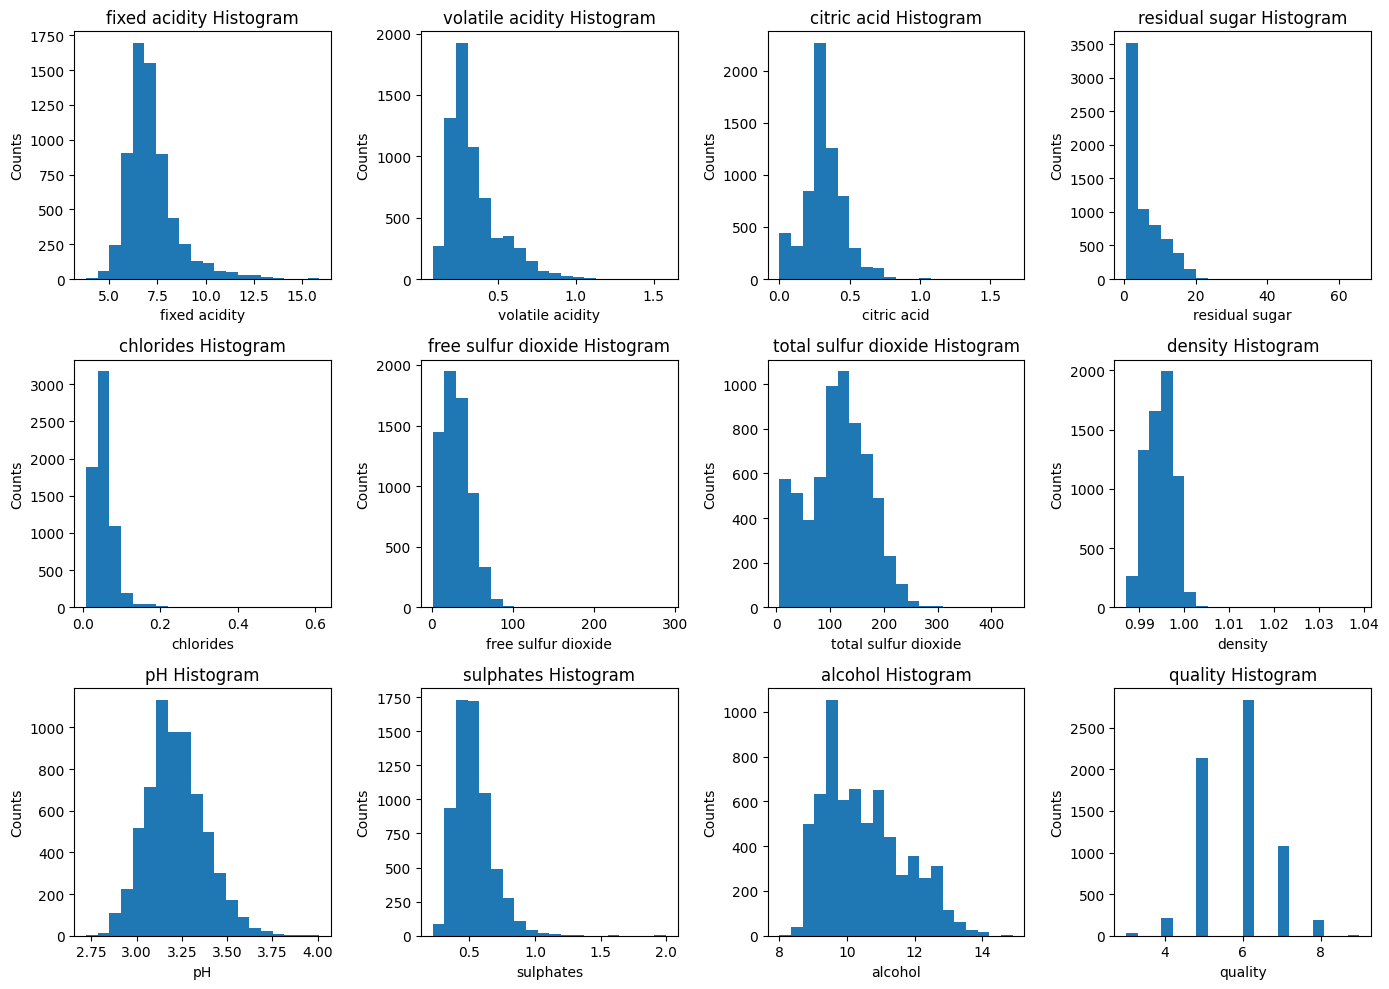

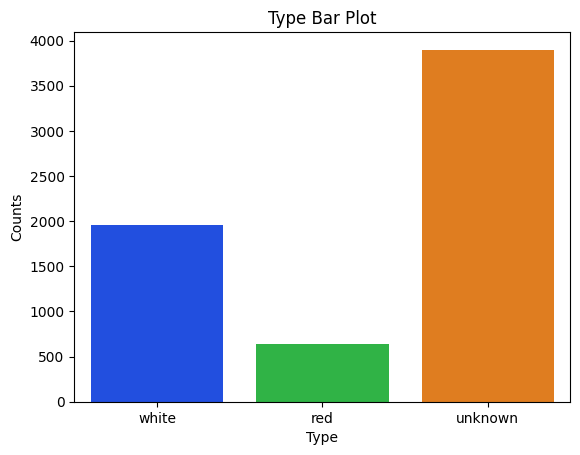

In [150]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol', 'quality']

plt.figure(figsize=(14, 10))
for i in range(len(features)):
    plt.subplot(3, 4, i + 1)
    plt.hist(df[features[i]], bins=20)
    plt.title(f'{features[i]} Histogram')
    plt.xlabel(features[i])
    plt.ylabel('Counts')
plt.tight_layout()
plt.show()

order = ['white', 'red', 'unknown']
sns.countplot(x='type', data=df, hue='type', palette='bright', order=order)
plt.title('Type Bar Plot')
plt.xlabel('Type')
plt.ylabel('Counts')
plt.show()


# Question 2

#2.1 Map white:0, red:1, unknown:2

In [155]:
df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']] = SimpleImputer(strategy='mean').fit_transform(df[features])

mapping = {'white': 0, 'red': 1, 'unknown': 2}
df['type_mapped'] = df['type'].map(mapping)

#2.2

In [156]:
input_df = df.drop(columns=['type', 'type_mapped'])
targets_df = df['type_mapped']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

((6497, 12), (6497,))

# Question 3

In [157]:
unknown_mask = (y == 2)
known_mask = (y == 0) | (y == 1)
x_known = x[known_mask]
y_known = y[known_mask]
x_unknown = x[unknown_mask]
x_known.shape, y_known.shape, x_unknown.shape


((2599, 12), (2599,), (3898, 12))

# Question 4

#Split Dataset to Train-Test


In [158]:
seed = 42
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x_known, y_known, test_size=test_size, random_state=seed, stratify=y_known)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1819, 12), (1819,), (780, 12), (780,))

# Question 5

# 5.1 Create a Random Forest Model


In [160]:
model_5 = RandomForestClassifier(random_state=seed)

# 5.2 Train Model on Training Set


In [161]:
model_5.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

# 5.3.1 Evaluate Model on Test Set

In [162]:
y_pred_test = model_5.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test, average='macro')
test_precision = precision_score(y_test, y_pred_test, average='macro')
test_recall = recall_score(y_test, y_pred_test, average='macro')

test_accuracy_percentage = round(test_accuracy*100, 3)
test_f1_percentage = round(test_f1*100, 3)
test_precision_percentage = round(test_precision*100, 3)
test_recall_percentage = round(test_recall*100, 3)

print("== TEST SET METRICS ==")
print(f'Accuracy: {test_accuracy_percentage}%')
print(f'F1: {test_f1_percentage}%')
print(f'Precision: {test_precision_percentage}%')
print(f'Recall: {test_recall_percentage}%')

== TEST SET METRICS ==
Accuracy: 99.872%
F1: 99.828%
Precision: 99.741%
Recall: 99.915%


# 5.3.2 Evaluate Model on Train Set

In [163]:
y_pred_train = model_5.predict(x_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
train_f1 = f1_score(y_train, y_pred_train, average='macro')
train_precision = precision_score(y_train, y_pred_train, average='macro')
train_recall = recall_score(y_train, y_pred_train, average='macro')

train_accuracy_percentage = round(train_accuracy*100, 3)
train_f1_percentage = round(train_f1*100, 3)
train_precision_percentage = round(train_precision*100, 3)
train_recall_percentage = round(train_recall*100, 3)

print("== TRAIN SET METRICS ==")
print(f'Accuracy: {train_accuracy_percentage}%')
print(f'F1: {train_f1_percentage}%')
print(f'Precision: {train_precision_percentage}%')
print(f'Recall: {train_recall_percentage}%')

== TRAIN SET METRICS ==
Accuracy: 99.945%
F1: 99.926%
Precision: 99.889%
Recall: 99.964%


Στο dataset της παρούσας εργασίας πιο αντιπροσωπευτική μετρική είναι η F1 και όχι η accuracy για τους εξής λόγους:
1. Η accuracy μπορεί να ειναι αντιπροσωπευτική μετρική σε ισορροπημένες κλάσεις, ωστόσο σε αυτό το dataset τα δείγματα white είναι πολλά περισσότερα από τα red.
2. H F1 (με average=macro) αξιολογεί ισότιμα την απόδοση και στις δύο κλάσεις συνδυάζοντας precision και recall ακόμα και όταν αυτές δεν είναι ισορροπημένες.



# Question 6

# 6.1 Create a new Random Forest Model


In [164]:
model_6 = RandomForestClassifier(random_state=seed, class_weight='balanced')

# 6.2 Train Model on Training Set


In [165]:
model_6.fit(x_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

# 6.3.1 Evaluate Model on Test Set

In [166]:
y_pred_test = model_6.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test, average='macro')
test_precision = precision_score(y_test, y_pred_test, average='macro')
test_recall = recall_score(y_test, y_pred_test, average='macro')

test_accuracy_percentage = round(test_accuracy*100, 3)
test_f1_percentage = round(test_f1*100, 3)
test_precision_percentage = round(test_precision*100, 3)
test_recall_percentage = round(test_recall*100, 3)

print("== TEST SET METRICS ==")
print(f'Accuracy: {test_accuracy_percentage}%')
print(f'F1: {test_f1_percentage}%')
print(f'Precision: {test_precision_percentage}%')
print(f'Recall: {test_recall_percentage}%')

== TEST SET METRICS ==
Accuracy: 99.615%
F1: 99.479%
Precision: 99.746%
Recall: 99.219%


# 6.3.2 Evaluate Model on Train Set

In [167]:
y_pred_train = model_6.predict(x_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
train_f1 = f1_score(y_train, y_pred_train, average='macro')
train_precision = precision_score(y_train, y_pred_train, average='macro')
train_recall = recall_score(y_train, y_pred_train, average='macro')

train_accuracy_percentage = round(train_accuracy*100, 3)
train_f1_percentage = round(train_f1*100, 3)
train_precision_percentage = round(train_precision*100, 3)
train_recall_percentage = round(train_recall*100, 3)

print("== TRAIN SET METRICS ==")
print(f'Accuracy: {train_accuracy_percentage}%')
print(f'F1: {train_f1_percentage}%')
print(f'Precision: {train_precision_percentage}%')
print(f'Recall: {train_recall_percentage}%')

== TRAIN SET METRICS ==
Accuracy: 99.945%
F1: 99.926%
Precision: 99.889%
Recall: 99.964%


Η παράμετρος class_weight=’balanced’ αλλάζει τα βάρη των κλάσεων με βάση τη συχνότητά τους, ώστε οι κλάσεις με το λιγότερα δείγματα (στην περίπτωσή μας, η red) να λαμβάνουν μεγαλύτερο βάρος κατά την εκπαίδευση, έτσι ώστε το μοντέλο να μην προτιμά την κλάση που εμφανίζεται συχνότερα (white).

# Question 7

In [168]:
y_unknown_proba=model_6.predict_proba(x_unknown)
white_proba = y_unknown_proba[:, 0]
red_proba = y_unknown_proba[:, 1]


# Question 8

In [169]:
x_semi = []
y_semi = []

for i, p in zip(x_unknown, red_proba):
    if p > 0.65:
        x_semi.append(i)
        y_semi.append(1)
    elif p < 0.35:
        x_semi.append(i)
        y_semi.append(0)

x_semi = np.array(x_semi)
y_semi = np.array(y_semi)

# Question 9

#9.1 Merge x_train with x_semi and y_train with y_semi

In [170]:
if len(y_semi) == 0:
    print("0 New Labels.")
else:
    x_train_new = np.vstack([x_train, x_semi])
    y_train_new = np.hstack([y_train, y_semi])

x_train.shape, x_train_new.shape, y_train.shape, y_train_new.shape

((1819, 12), (5664, 12), (1819,), (5664,))

# 9.2 Create a new Random Forest Model


In [171]:
model_9 = RandomForestClassifier(random_state=seed, class_weight='balanced')

# 9.3 Train Model on Training Set


In [172]:
model_9.fit(x_train_new, y_train_new)


RandomForestClassifier(class_weight='balanced', random_state=42)

# 9.4.1 Evaluate Model on Test Set

In [174]:
y_pred_test = model_9.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test, average='macro')
test_precision = precision_score(y_test, y_pred_test, average='macro')
test_recall = recall_score(y_test, y_pred_test, average='macro')

test_accuracy_percentage = round(test_accuracy*100, 3)
test_f1_percentage = round(test_f1*100, 3)
test_precision_percentage = round(test_precision*100, 3)
test_recall_percentage = round(test_recall*100, 3)

print("== TEST SET METRICS ==")
print(f'Accuracy: {test_accuracy_percentage}%')
print(f'F1: {test_f1_percentage}%')
print(f'Precision: {test_precision_percentage}%')
print(f'Recall: {test_recall_percentage}%')

== TEST SET METRICS ==
Accuracy: 99.615%
F1: 99.481%
Precision: 99.568%
Recall: 99.394%


# 9.4.2 Evaluate Model on Train Set

In [175]:
y_pred_train = model_9.predict(x_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
train_f1 = f1_score(y_train, y_pred_train, average='macro')
train_precision = precision_score(y_train, y_pred_train, average='macro')
train_recall = recall_score(y_train, y_pred_train, average='macro')

train_accuracy_percentage = round(train_accuracy*100, 3)
train_f1_percentage = round(train_f1*100, 3)
train_precision_percentage = round(train_precision*100, 3)
train_recall_percentage = round(train_recall*100, 3)

print("== TRAIN SET METRICS ==")
print(f'Accuracy: {train_accuracy_percentage}%')
print(f'F1: {train_f1_percentage}%')
print(f'Precision: {train_precision_percentage}%')
print(f'Recall: {train_recall_percentage}%')

== TRAIN SET METRICS ==
Accuracy: 99.945%
F1: 99.926%
Precision: 99.889%
Recall: 99.964%


# Question 10

In [177]:
x_train_10 = x_train.copy()
y_train_10 = y_train.copy()
x_unknown_10 = x_unknown.copy()

iteration = 0
added_total = 0

while (1):
    iteration += 1
    print(f"Iteration {iteration}")

    model_10 = RandomForestClassifier(random_state=42, class_weight='balanced')
    model_10.fit(x_train_10, y_train_10)

    y_unknown_proba_10 = model_10.predict_proba(x_unknown_10)
    red_proba = y_unknown_proba_10[:, 1]

    x_semi = []
    y_semi = []
    keep_list = []

    for i, p in zip(x_unknown_10, red_proba):
      if p > 0.65:
        x_semi.append(i)
        y_semi.append(1)
        keep_list.append(False)
      elif p < 0.35:
        x_semi.append(i)
        y_semi.append(0)
        keep_list.append(False)
      else:
        keep_list.append(True)

    x_semi = np.array(x_semi)
    y_semi = np.array(y_semi)
    keep_list = np.array(keep_list)

    if len(y_semi) == 0:
      print("0 New Labels.")
      break
    else:
      x_train_10 = np.vstack([x_train_10, x_semi])
      y_train_10 = np.hstack([y_train_10, y_semi])

    added_total += len(y_semi)
    print(f"Added {len(y_semi)} samples (Total: {added_total})")

    x_unknown_10 = x_unknown_10[keep_list]
    print(f"Remaining unknown samples: {len(x_unknown_10)}\n")

x_train_10.shape, y_train_10.shape


Iteration 1
Added 3845 samples (Total: 3845)
Remaining unknown samples: 53

Iteration 2
Added 16 samples (Total: 3861)
Remaining unknown samples: 37

Iteration 3
Added 3 samples (Total: 3864)
Remaining unknown samples: 34

Iteration 4
Added 5 samples (Total: 3869)
Remaining unknown samples: 29

Iteration 5
Added 4 samples (Total: 3873)
Remaining unknown samples: 25

Iteration 6
Added 3 samples (Total: 3876)
Remaining unknown samples: 22

Iteration 7
Added 2 samples (Total: 3878)
Remaining unknown samples: 20

Iteration 8
Added 4 samples (Total: 3882)
Remaining unknown samples: 16

Iteration 9
Added 1 samples (Total: 3883)
Remaining unknown samples: 15

Iteration 10
0 New Labels.


((5702, 12), (5702,))

#Part 2: Model Evaluation

# Import Libraries

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import files
import io
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.metrics import mean_absolute_error


# Question 1

# 1.1 Load Dataset


In [69]:
uploaded = files.upload()


Saving wine-full.csv to wine-full (1).csv


In [83]:
df = pd.read_csv(io.BytesIO(uploaded['wine-full (1).csv']))
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# 1.2 Plot Quality

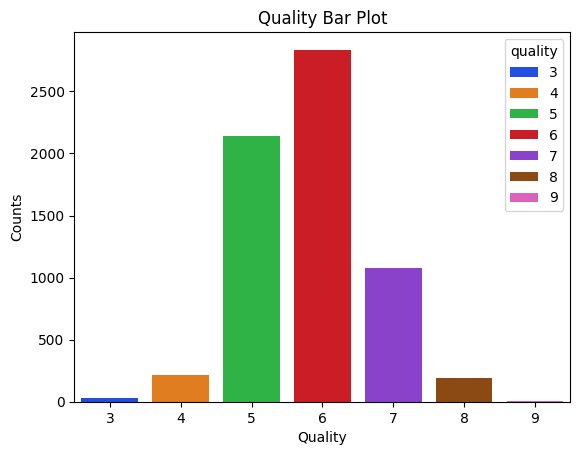

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64


In [85]:
sns.countplot(x='quality', data=df, hue='quality', palette='bright')
plt.title('Quality Bar Plot')
plt.xlabel('Quality')
plt.ylabel('Counts')
plt.show()
print(df['quality'].value_counts())

Από το παραπάνω ραβδόγραμμα παρατηρείται ότι το quality δεν είναι ισορροπημένο  (imbalanced), αφού τα περισσότερα σκορ είναι 6,5 και 7 ενώ τα υπόλοιπα είναι πολύ λιγότερα. Αντιθέτως, αν το quality ήταν ισορροπημένο (balanced) οι τιμές θα ήταν ομοιόμορφα κατανεμημένες.

# Question 2





#Wine Quality by Type

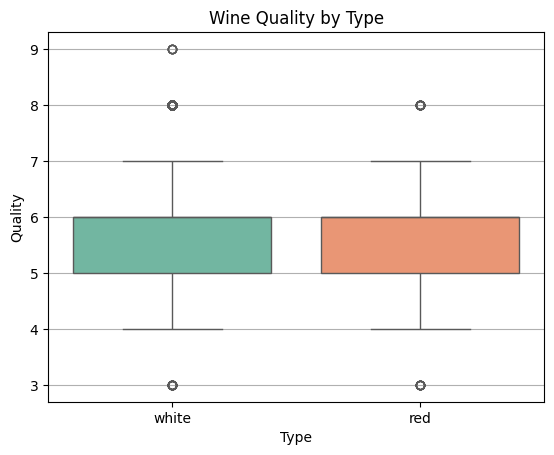

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [86]:
sns.boxplot(data=df, x="type", hue="type", y="quality", palette="Set2")
plt.title("Wine Quality by Type")
plt.xlabel('Type')
plt.ylabel('Quality')
plt.grid(axis='y')
plt.show()
df.groupby("type")["quality"].describe()

Σύμφωνα με τα παραπάνω στοιχεία, το λευκό κρασί είναι ελαφρώς ποιοτικά καλύτερο από το κόκκινο αφού η μέση τιμή της ποιότητάς του είναι 5.88, ενώ του κόκκινου 5.64. Ωστόσο, η διαφορά της ποιότητάς τους είναι πολύ μικρή, κάτι που επαληθεύεται και από το παραπάνω διάγραμμα.

# Question 3

#Wine Quality by Sweetness

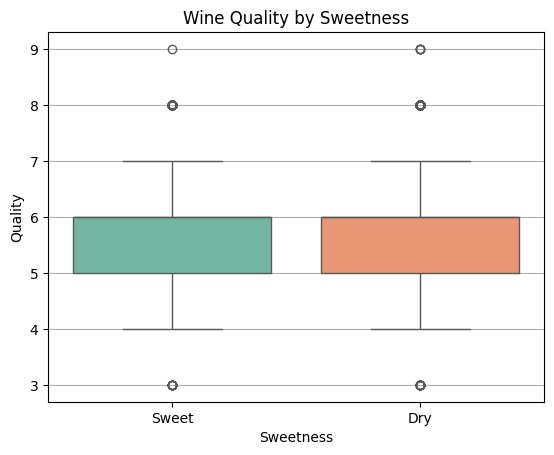

,count,mean,std,min,25%,50%,75%,max
sweetness,,,,,,,,
Dry,3923.0,5.842722,0.895903,3.0,5.0,6.0,6.0,9.0
Sweet,2574.0,5.781274,0.836371,3.0,5.0,6.0,6.0,9.0


In [87]:
threshold_residual_sugar = 5
df['sweetness'] = df['residual sugar'].apply(lambda x: 'Dry' if x <= threshold_residual_sugar else 'Sweet')
sns.boxplot(data=df, x="sweetness", hue="sweetness", y="quality", palette="Set2")
plt.title("Wine Quality by Sweetness")
plt.xlabel('Sweetness')
plt.ylabel('Quality')
plt.grid(axis='y')
plt.show()
df.groupby("sweetness")["quality"].describe()


In [88]:
df = df.drop(columns=['sweetness'])

Σύμφωνα με τα παραπάνω στοιχεία, το ξηρό κρασί είναι ελαφρώς ποιοτικά καλύτερο από το γλυκό αφού η μέση τιμή της ποιότητάς του είναι 5.84, ενώ του γλυκού 5.78. Ωστόσο, η διαφορά της ποιότητάς τους είναι πολύ μικρή, κάτι που επαληθεύεται και από το παραπάνω διάγραμμα.

#Question 4

#4.1 Map white:0, red:1

In [89]:
mapping = {'white': 0, 'red': 1}
df['type'] = df['type'].map(mapping)
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,0,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,1,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,1,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,1,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,1,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# 4.2 Convert DataFrame to Numpy Arrays


In [90]:
input_df = df.drop(columns=['quality'])
targets_df = df['quality']
x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

((6497, 12), (6497,))

# 4.3 Split Dataset to Train-Test






In [91]:
seed = 0
test_size = 0.1

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5847, 12), (5847,), (650, 12), (650,))

#Question 5

# 5.1 Create a Decision Tree Regressor


In [93]:
model_2_5 = DecisionTreeRegressor(random_state=seed)

# 5.2 Train Model on Training Set


In [94]:
model_2_5.fit(x_train, y_train)


DecisionTreeRegressor(random_state=0)

# 5.3 Evaluate Model on Test Set

In [95]:
y_pred = model_2_5.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')



Mean Absolute Error (MAE): 0.44769230769230767


#Question 6

In [96]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
test_size = 0.1
mae = []

for seed in seeds:
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
  model = DecisionTreeRegressor(random_state=0)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  mae.append(mean_absolute_error(y_test, y_pred))
  print(f'Seeds: {seeds[seed]} -> MAE: {mae[seed]}')

mean_mae = np.mean(mae)
std_mae = np.std(mae)
print('====================================')
print('Mean MAE: ', mean_mae)
print('STD MAE: ', std_mae)

Seeds: 0 -> MAE: 0.44769230769230767
Seeds: 1 -> MAE: 0.5
Seeds: 2 -> MAE: 0.4338461538461538
Seeds: 3 -> MAE: 0.4707692307692308
Seeds: 4 -> MAE: 0.5046153846153846
Seeds: 5 -> MAE: 0.4338461538461538
Seeds: 6 -> MAE: 0.48923076923076925
Seeds: 7 -> MAE: 0.46615384615384614
Seeds: 8 -> MAE: 0.4307692307692308
Seeds: 9 -> MAE: 0.4846153846153846
Mean MAE:  0.4661538461538462
STD MAE:  0.026832815729997475


Το μοντέλο του ερωτήματος 5 είναι αξιόπιστο καθώς η τυπική απόκλιση των MAE είναι μικρή (0.0268). Συνεπώς, το σφάλμα του μοντέλου δεν επηρεάζεται σημαντικά από διαφορετικούς διαχωρισμούς δεδομένων. Επομένως, θα αποδίδει με παρόμοιο τρόπο σε νέα άγνωστα δεδομένα, με αναμενόμενο MAE περίπου 0.46.

#Question 7

# 7.1 Split Dataset to Train-Validation-Test


In [97]:
seed = 0
test_size = 0.1
valid_size = 0.2

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=valid_size, random_state=seed)
x_train.shape, y_train.shape, x_valid.shape, y_valid.shape, x_test.shape, y_test.shape

((4677, 12), (4677,), (1170, 12), (1170,), (650, 12), (650,))

# 7.2


In [98]:
depths = [None, 3, 5, 7, 9]
splits = [2, 5, 10]
params_combinations = [{"max_depth": depth, "min_samples_split": split} for depth in depths for split in splits]
mae = []
for params in params_combinations:
    model = DecisionTreeRegressor(random_state=0, **params)
    model.fit(x_train, y_train)
    mae.append({'params': params, 'mae_train': mean_absolute_error(y_train, model.predict(x_train)), 'mae_valid': mean_absolute_error(y_valid, model.predict(x_valid))})
mae


[{'params': {'max_depth': None, 'min_samples_split': 2},
  'mae_train': 0.0008552490912978405,
  'mae_valid': 0.5094017094017094},
 {'params': {'max_depth': None, 'min_samples_split': 5},
  'mae_train': 0.06371605730168911,
  'mae_valid': 0.5062678062678063},
 {'params': {'max_depth': None, 'min_samples_split': 10},
  'mae_train': 0.16642366732167885,
  'mae_valid': 0.5354555012888347},
 {'params': {'max_depth': 3, 'min_samples_split': 2},
  'mae_train': 0.5835424795080484,
  'mae_valid': 0.59002504497395},
 {'params': {'max_depth': 3, 'min_samples_split': 5},
  'mae_train': 0.5835424795080484,
  'mae_valid': 0.59002504497395},
 {'params': {'max_depth': 3, 'min_samples_split': 10},
  'mae_train': 0.5835424795080484,
  'mae_valid': 0.59002504497395},
 {'params': {'max_depth': 5, 'min_samples_split': 2},
  'mae_train': 0.5421072718498778,
  'mae_valid': 0.5686565409646371},
 {'params': {'max_depth': 5, 'min_samples_split': 5},
  'mae_train': 0.5421072718498778,
  'mae_valid': 0.568656540

#Question 8

Tο validation set είναι πιο αξιόπιστο για την επιλογή των υπερπαραμέτρων, καθώς είναι ένα ανεξάρτητο σύνολο δεδομένων που δεν το έχει δει το μοντέλο κατά τη διαδικασία της εκπαίδευσης. Από την άλλη μεριά, το μοντέλο μπορεί να μάθει πολύ καλά ακόμα και τον θόρυβο του training set και να έχει πολύ μικρό MAE στο training set, ωστόσο δεν θα γενικεύει καλά σε νέα άγνωστα δεδομένα. Συνεπώς, η επιλογή των παραμέτρων πρέπει να γίνει στο validation set ώστε να αποφευχθεί η επιλογή παραμέτρων που απλώς απομνημονεύουν το training set.

#Question 9

# 9.1 Split Dataset to Train-Test


In [99]:
seed = 0
test_size = 0.1

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5847, 12), (5847,), (650, 12), (650,))

#9.2 Grid Search for Decision Tree Hyperparameters

In [100]:
params_grid_9 = {'max_depth': [None, 3, 5, 7, 9], 'min_samples_split': [2, 5, 10]}

grid_search_9 = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=params_grid_9, cv=10, scoring="neg_mean_absolute_error", n_jobs=-1)



# 9.3 Train Model on Training Set


In [102]:
grid_search_9.fit(x_train, y_train)


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 5, 7, 9],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_absolute_error')

#Question 10

#10.1 Select the Best Parameters

In [103]:
print("Best parameters:", grid_search_9.best_params_)
print("Best cross-validation MAE:", -grid_search_9.best_score_)
best_model = grid_search_9.best_estimator_

Best parameters: {'max_depth': None, 'min_samples_split': 2}
Best cross-validation MAE: 0.4882879639386489


# 10.2 Evaluate the Best Model on Test Set

In [104]:
y_pred = best_model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
print("Test MAE:", mae)



Test MAE: 0.44769230769230767


Η πιο αξιόπιστη μεθοδολογία που ακολουθήθηκε είναι η 10-fold cross-validation (9), καθώς το μοντέλο αξιολογήθηκε επαναληπτικά σε πολλαπλά traing set. Με αυτόν τον τρόπο, εξασφαλίζεται καλύτερη γενίκευση και αποφεύγεται η υπερπροσαρμογή συγκριτικά με την υψηλή αστάθεια του ερωτήματος (6) και την πιο περιορισμένη προσέγγιση (validation) του (7).

#Question 11

#11.1 Grid Search for Decision Tree Hyperparameters

In [105]:
params_grid_11 = {'max_depth': [5], 'min_samples_split': [2, 5, 10]}

grid_search_11 = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=params_grid_11, cv=10, scoring="neg_mean_absolute_error", n_jobs=-1)


# 11.2 Train Model on Training Set


In [106]:
grid_search_11.fit(x_train, y_train)


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [5], 'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_absolute_error')

#11.3 Select the Best Parameters

In [107]:
print("Best parameters:", grid_search_11.best_params_)
print("Best cross-validation MAE:", -grid_search_11.best_score_)
best_model = grid_search_11.best_estimator_

Best parameters: {'max_depth': 5, 'min_samples_split': 2}
Best cross-validation MAE: 0.5668091119767175


# 11.4 Evaluate the Best Model on Test Set

In [108]:
y_pred = best_model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
print("Test MAE:", mae)



Test MAE: 0.5534852696756091


#11.5 Plot the Best Tree Model

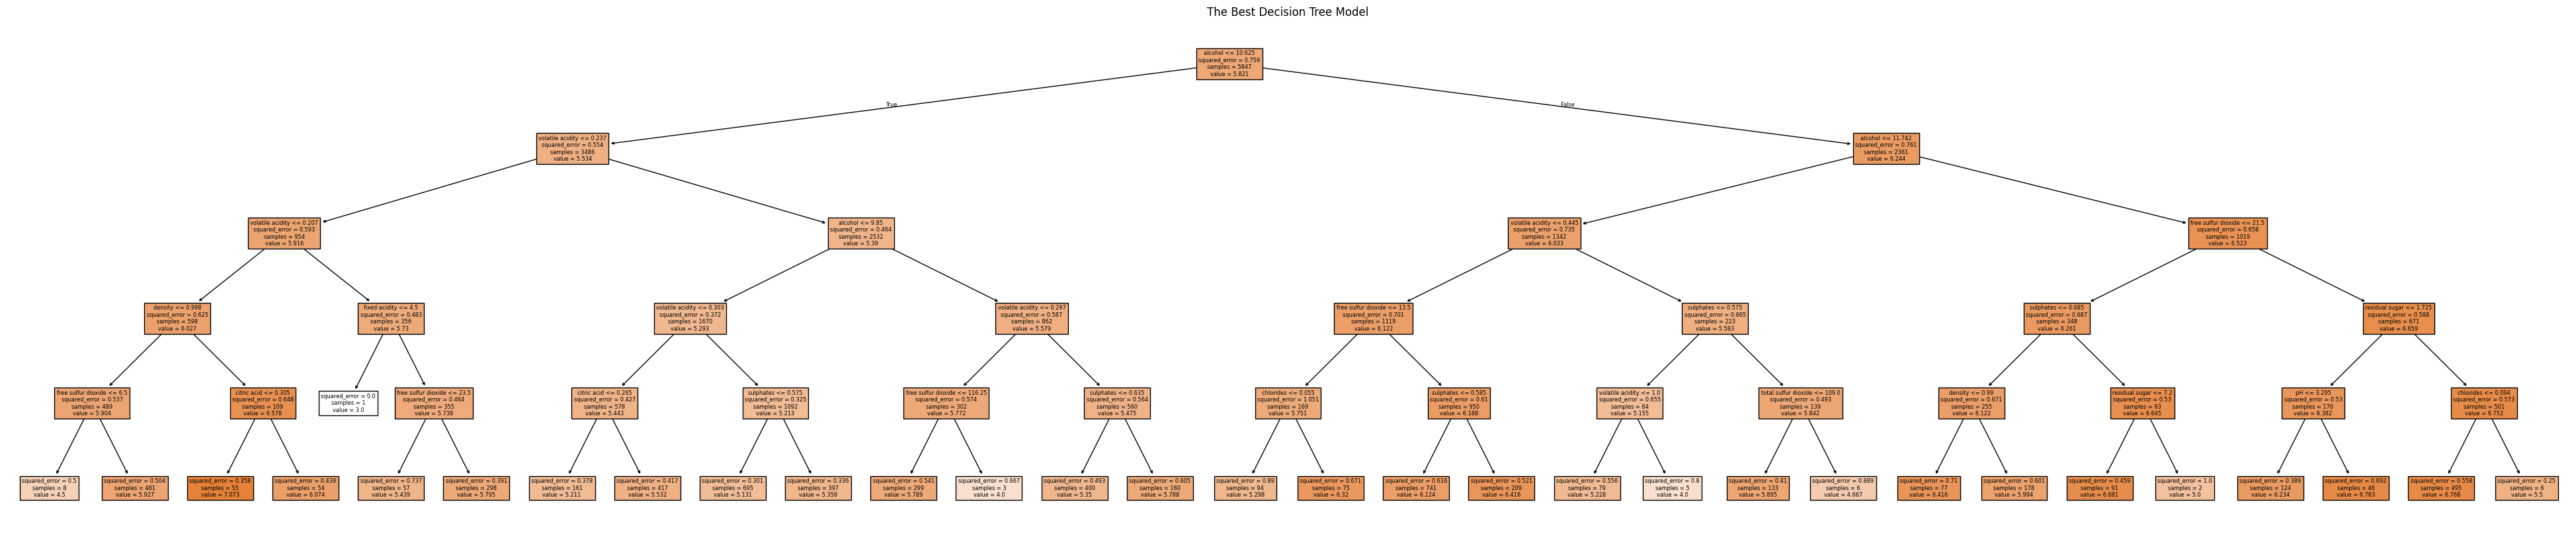

In [109]:
plt.figure(figsize=(50,10))
plot_tree(best_model, feature_names=input_df.columns, filled=True,)
plt.title("The Best Decision Tree Model")
plt.show()

#11.6 Export Rules

IF alcohol ≤ 10.625 AND volatile acidity ≤ 0.237 AND volatile acidity ≤ 0.207 AND density ≤ 0.998 AND free sulfur dioxide ≤ 6.500 THEN quality ≈ 4.50

IF alcohol ≤ 10.625 AND volatile acidity ≤ 0.237 AND volatile acidity ≤ 0.207 AND density ≤ 0.998 AND free sulfur dioxide > 6.500 THEN quality ≈ 5.93

IF alcohol ≤ 10.625 AND volatile acidity ≤ 0.237 AND volatile acidity ≤ 0.207 AND density > 0.998 AND citric acid ≤ 0.305 THEN quality ≈ 7.07

IF alcohol ≤ 10.625 AND volatile acidity ≤ 0.237 AND volatile acidity ≤ 0.207 AND density > 0.998 AND citric acid > 0.305 THEN quality ≈ 6.07

IF alcohol ≤ 10.625 AND volatile acidity ≤ 0.237 AND volatile acidity > 0.207 AND fixed acidity ≤ 4.500 THEN quality ≈ 3.00

IF alcohol ≤ 10.625 AND volatile acidity ≤ 0.237 AND volatile acidity > 0.207 AND fixed acidity > 4.500 AND free sulfur dioxide ≤ 23.500 THEN quality ≈ 5.44

IF alcohol ≤ 10.625 AND volatile acidity ≤ 0.237 AND volatile acidity > 0.207 AND fixed acidity > 4.500 AND free sulfur dioxide > 23.500 THEN quality ≈ 5.80

IF alcohol ≤ 10.625 AND volatile acidity > 0.237 AND alcohol ≤ 9.850 AND volatile acidity ≤ 0.303 AND citric acid ≤ 0.265 THEN quality ≈ 5.21

IF alcohol ≤ 10.625 AND volatile acidity > 0.237 AND alcohol ≤ 9.850 AND volatile acidity ≤ 0.303 AND citric acid > 0.265 THEN quality ≈ 5.53

IF alcohol ≤ 10.625 AND volatile acidity > 0.237 AND alcohol ≤ 9.850 AND volatile acidity > 0.303 AND sulphates ≤ 0.575 THEN quality ≈ 5.13

IF alcohol ≤ 10.625 AND volatile acidity > 0.237 AND alcohol ≤ 9.850 AND volatile acidity > 0.303 AND sulphates > 0.575 THEN quality ≈ 5.36

IF alcohol ≤ 10.625 AND volatile acidity > 0.237 AND alcohol > 9.850 AND volatile acidity ≤ 0.297 AND free sulfur dioxide ≤ 116.250 THEN quality ≈ 5.79

IF alcohol ≤ 10.625 AND volatile acidity > 0.237 AND alcohol > 9.850 AND volatile acidity ≤ 0.297 AND free sulfur dioxide > 116.250 THEN quality ≈ 4.00

IF alcohol ≤ 10.625 AND volatile acidity > 0.237 AND alcohol > 9.850 AND volatile acidity > 0.297 AND sulphates ≤ 0.635 THEN quality ≈ 5.35

IF alcohol ≤ 10.625 AND volatile acidity > 0.237 AND alcohol > 9.850 AND volatile acidity > 0.297 AND sulphates > 0.635 THEN quality ≈ 5.79

IF alcohol > 10.625 AND alcohol ≤ 11.742 AND volatile acidity ≤ 0.445 AND free sulfur dioxide ≤ 13.500 AND chlorides ≤ 0.055 THEN quality ≈ 5.30

IF alcohol > 10.625 AND alcohol ≤ 11.742 AND volatile acidity ≤ 0.445 AND free sulfur dioxide ≤ 13.500 AND chlorides > 0.055 THEN quality ≈ 6.32

IF alcohol > 10.625 AND alcohol ≤ 11.742 AND volatile acidity ≤ 0.445 AND free sulfur dioxide > 13.500 AND sulphates ≤ 0.585 THEN quality ≈ 6.12

IF alcohol > 10.625 AND alcohol ≤ 11.742 AND volatile acidity ≤ 0.445 AND free sulfur dioxide > 13.500 AND sulphates > 0.585 THEN quality ≈ 6.42

IF alcohol > 10.625 AND alcohol ≤ 11.742 AND volatile acidity > 0.445 AND sulphates ≤ 0.575 AND volatile acidity ≤ 1.000 THEN quality ≈ 5.23

IF alcohol > 10.625 AND alcohol ≤ 11.742 AND volatile acidity > 0.445 AND sulphates ≤ 0.575 AND volatile acidity > 1.000 THEN quality ≈ 4.00

IF alcohol > 10.625 AND alcohol ≤ 11.742 AND volatile acidity > 0.445 AND sulphates > 0.575 AND total sulfur dioxide ≤ 109.000 THEN quality ≈ 5.89

IF alcohol > 10.625 AND alcohol ≤ 11.742 AND volatile acidity > 0.445 AND sulphates > 0.575 AND total sulfur dioxide > 109.000 THEN quality ≈ 4.67

IF alcohol > 10.625 AND alcohol > 11.742 AND free sulfur dioxide ≤ 21.500 AND sulphates ≤ 0.685 AND density ≤ 0.990 THEN quality ≈ 6.42

IF alcohol > 10.625 AND alcohol > 11.742 AND free sulfur dioxide ≤ 21.500 AND sulphates ≤ 0.685 AND density > 0.990 THEN quality ≈ 5.99

IF alcohol > 10.625 AND alcohol > 11.742 AND free sulfur dioxide ≤ 21.500 AND sulphates > 0.685 AND residual sugar ≤ 7.200 THEN quality ≈ 6.68

IF alcohol > 10.625 AND alcohol > 11.742 AND free sulfur dioxide ≤ 21.500 AND sulphates > 0.685 AND residual sugar > 7.200 THEN quality ≈ 5.00

IF alcohol > 10.625 AND alcohol > 11.742 AND free sulfur dioxide > 21.500 AND residual sugar ≤ 1.725 AND pH ≤ 3.295 THEN quality ≈ 6.23

IF alcohol > 10.625 AND alcohol > 11.742 AND free sulfur dioxide > 21.500 AND residual sugar ≤ 1.725 AND pH > 3.295 THEN quality ≈ 6.78

IF alcohol > 10.625 AND alcohol > 11.742 AND free sulfur dioxide > 21.500 AND residual sugar > 1.725 AND chlorides ≤ 0.094 THEN quality ≈ 6.77

IF alcohol > 10.625 AND alcohol > 11.742 AND free sulfur dioxide > 21.500 AND residual sugar > 1.725 AND chlorides > 0.094 THEN quality ≈ 5.50

Από τους παραπάνω κανόνες προκύπτει ότι η ποιότητα του κρασιού είναι υψηλότερη όσο περισσότερο alcohol έχει. Επιπλέον, σύμφωνα με το μοντέλο τα ποιοτικά κρασιά έχουν χαμηλά επίπεδα volatile acidity και υψηλά επίπεδα sulphates

# 11.7 Plot Sorted Feature Importances

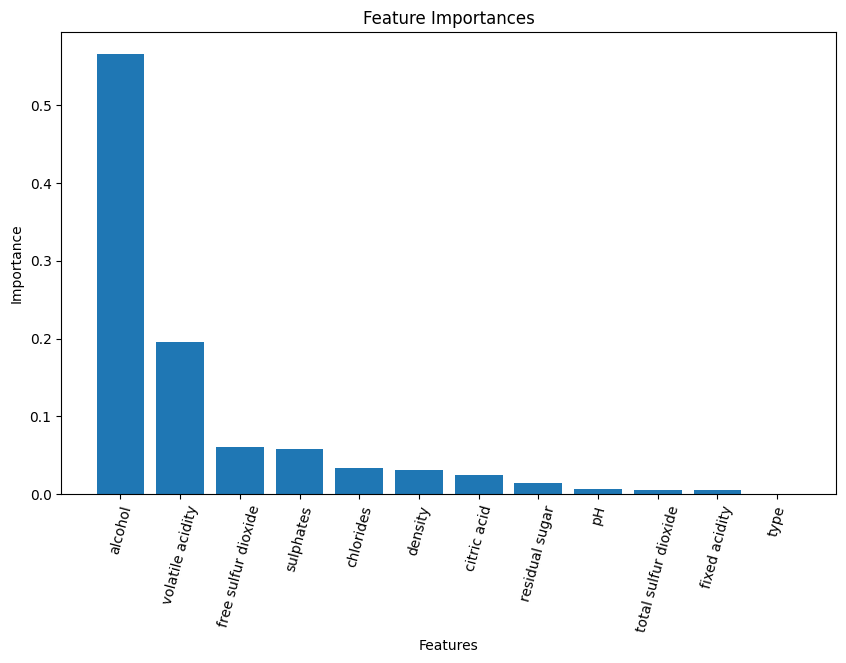

In [110]:
feature_importances = best_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = [input_df.columns[i] for i in sorted_indices]
sorted_importances = feature_importances[sorted_indices]

plt.figure(figsize=(10,6))
plt.bar(sorted_features, sorted_importances)
plt.xticks(rotation=75)
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

